In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import gym

In [0]:
gym.__file__

'/usr/local/lib/python3.6/dist-packages/gym/__init__.py'

In [0]:
mv '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/cartpole.py' '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/cartpole_1.py'

In [0]:
mv './task1.py' '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/cartpole.py'

In [0]:
ls '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control'

acrobot.py     cartpole.py                 mountain_car.py  rendering.py
assets/        continuous_mountain_car.py  pendulum.py
cartpole_1.py  __init__.py                 __pycache__/


In [0]:
cat  '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/cartpole_1.py'

"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np

class CartPoleEnv(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

    Source:
        This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson

    Observation: 
        Type: Box(4)
        Num	Observation                 Min         Max
        0	Cart Position             -4.8            4.8
        1	Cart Velocity             -Inf            Inf
        2	Pole Angle                 -24 deg        24 deg
        3	Pole Velocity At Tip      -Inf         

In [0]:
cat  '/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/cartpole.py'

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
class CartPoleEnv(gym.Env):
	metadata = {
			'render.modes': ['human', 'rgb_array'],
			'video.frames_per_second' : 50
	}

	def __init__(self,case=1):
		self.__version__ = "0.2.0"
		print("CartPoleEnv - Version {}, Noise case: {}".format(self.__version__,case))
		self.gravity = 9.8
		self.masscart = 1.0
		self.masspole = 0.4
		self.total_mass = (self.masspole + self.masscart)
		self.length = 0.5 
		self.polemass_length = (self.masspole * self.length)
		self._seed()

		self.force_mag = 10.0
		#self.force_mag = 10.0*(1+self.np_random.uniform(low=-0.10, high=0.10))

		 
		self.tau = 0.02  # seconds between state updates
		self.frictioncart = 5e-4 # AA Added cart friction
		self.frictionpole = 2e-6 # AA Added cart friction
		self.gravity_eps = 0.99 # Random scaling for gravity
		self.frictioncart_eps = 0.99 # Random scaling for friction
		self.frictionpole_eps = 0.99 # Random scaling for 

In [0]:
import sys

orig_stdout = sys.stdout
f = open('./drive/My Drive/Ml_para/ml_task1/out1.txt', 'w')
sys.stdout = f


In [0]:
import gym
import random
import numpy as np
import math
from statistics import median, mean
from collections import Counter
import keras

env = gym.make("CartPole-v1")
env.reset()
goal_steps = 500

def population(model=False,initial_games=1000):
    training_data = []
    scores = []
    accepted_scores = []
    all_game_memory=[]
    for _ in range(initial_games):
        score = 0
        game_memory = []
        prev_observation = []
        for _ in range(goal_steps):
            if model==False or len(prev_observation)==0:
                action = random.randrange(0,2)
            else:
                action = np.argmax(model.predict(prev_observation.reshape(-1,len(prev_observation)))[0])
            observation, reward, done, info = env.step(action)
            if len(prev_observation) > 0 :
                game_memory.append([prev_observation, action])
            prev_observation = observation
            score+=reward
            if done:
              all_game_memory.append(game_memory)
              scores.append(score)
              break
        env.reset()
        
    top100=sorted(range(len(scores)),key=lambda i:scores[i])[-100:]
    for ind in top100:
        accepted_scores.append(scores[ind])
        for data in all_game_memory[ind]:
            if data[1] == 1:
                output = [0,1]
            elif data[1] == 0:
                output = [1,0]
            training_data.append([data[0], output])
        
        
    
    # just in case you wanted to reference later
    training_data_save = np.array(training_data)
    np.save('saved.npy',training_data_save)
    
    # some stats here, to further illustrate the neural network magic!
    # print('Average accepted score:',mean(accepted_scores))
    print('Median score for accepted scores:',median(accepted_scores))
    print(Counter(accepted_scores))
    del all_game_memory
    return mean(accepted_scores),training_data


from keras.layers import Dense, Embedding, Dropout, Input
import keras
def neural_network_model(input_size):
    input1 = keras.layers.Input(shape=(input_size,))
    x = keras.layers.Dense(128, activation='relu')(input1)
    x=Dropout(rate=0.2)(x)
    x = keras.layers.Dense(256, activation='relu')(x)
    x=Dropout(rate=0.2)(x)
    x = keras.layers.Dense(512, activation='relu')(x)
    x=Dropout(rate=0.2)(x)
    x = keras.layers.Dense(256, activation='relu')(x)
    x=Dropout(rate=0.2)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x=Dropout(rate=0.2)(x)
    out = keras.layers.Dense(2,activation='softmax')(x)
    model = keras.models.Model(inputs=[input1], outputs=out)
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['categorical_crossentropy'])
    return model


def train_model(training_data, model=False,epochs=3):

    X = np.array([i[0] for i in training_data]).reshape(-1,len(training_data[0][0]))
    # print(X)
    y = np.array([i[1] for i in training_data])
    # print('y\n\n\n\n',y)
    if not model:
        model = neural_network_model(input_size = len(X[0]))
    # print('X shape',X.shape)
    model.fit(x=[X], y=y, epochs=epochs,batch_size=100,verbose=1)
    return model
def train_n_gens(n,model=False,initial_games=1000):
    for i in range(n):
        if i==0 and model==False:
            prev_mean,training_data = population()
        else:
            try:
              prev_mean,training_data=population(model=model,initial_games=initial_games)
            except NameError:
              prev_mean,training_data=population(model=model,initial_games=initial_games)

        model = train_model(training_data,epochs=10)
        # logging.info("%03d prev mean:- %f"%(i,prev_mean))
        model.save('/content/drive/My Drive/Ml_para/ml_task1/model_%03d.h5'%(i+60))
    final_population(model)

def final_population(model):
    scores = []
    choices = []
    
    for each_game in range(100):
        score = 0
        game_memory = []
        prev_obs = []
        env.reset()

        for _ in range(goal_steps):
            # env.render()

            if len(prev_obs)==0:
                action = random.randrange(0,2)
            else:
                action = np.argmax(model.predict(prev_obs.reshape(-1,len(prev_obs)))[0])

            choices.append(action)
                    
            new_observation, reward, done, info = env.step(action)
            prev_obs = new_observation
            # game_memory.append([new_observation, action])
            score+=reward
            if done:
              scores.append(score)
              break

        # scores.append(score)

    print('Average Score:',sum(scores)/len(scores))
    print(Counter(scores))
    print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))
    return sum(scores)/len(scores)
from keras.models import load_model
model = load_model('/content/drive/My Drive/Ml_para/ml_task1/model_059.h5')
train_n_gens(5,model,initial_games=2000)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:

sys.stdout = orig_stdout

f.close()

In [0]:
import gym
import random
import numpy as np
import math
from statistics import median, mean
from collections import Counter
import keras

env = gym.make("CartPole-v1")
env.reset()
goal_steps = 500
score_requirement = 50
initial_games = 1000
def final_population(model):
    scores = []
    choices = []
    
    for each_game in range(100):
        score = 0
        game_memory = []
        prev_obs = []
        env.reset()

        for _ in range(goal_steps):
            # env.render()

            if len(prev_obs)==0:
                action = random.randrange(0,2)
            else:
                action = np.argmax(model.predict(prev_obs.reshape(-1,len(prev_obs)))[0])

            choices.append(action)
                    
            new_observation, reward, done, info = env.step(action)
            prev_obs = new_observation
            # game_memory.append([new_observation, action])
            score+=reward
            if done:
              scores.append(score)
              break

        # scores.append(score)

    print('Average Score:',sum(scores)/len(scores))
    print(Counter(scores))
    print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))
    return sum(scores)/len(scores)
from keras.models import load_model
model = load_model('/content/drive/My Drive/Ml_para/ml_task1/model_059.h5')
final_population(model)

CartPoleEnv - Version 0.2.0, Noise case: 1


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym.envs.classic_control.cartpole.CartPoleEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Average Score: 480.29
Counter({500.0: 85, 405.0: 1, 383.0: 1, 402.0: 1, 239.0: 1, 178.0: 1, 344.0: 1, 446.0: 1, 395.0: 1, 453.0: 1, 401.0: 1, 416.0: 1, 365.0: 1, 403.0: 1, 412.0: 1, 287.0: 1})
choice 1:0.4991359387036998  choice 0:0.5008640612963001


480.29

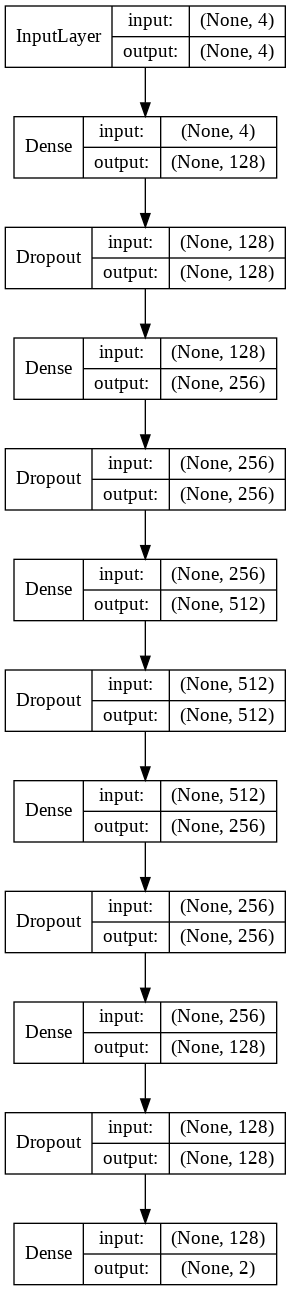

In [7]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Ml_para/ml_task1/model_059.h5')
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=False)